# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
#To make sure that plots are rendered correctly in jupyter notebooks.

## Warning Suppression

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Setting Display

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
# Load the Data
df=pd.read_csv(r"C:\Users\priya\PycharmProjects\Response_modeling_for_supermarket\Data\features_df")

In [5]:
print("The shape of the data is,", df.shape)

The shape of the data is, (2058, 27)


In [6]:
df.head()

Education Marital_Status   Income  Recency  MntWines  MntFruits  \
0  Graduation         Single  58138.0       58       635         88   
1  Graduation         Single  46344.0       38        11          1   
2  Graduation         Couple  71613.0       26       426         49   
3  Graduation         Couple  26646.0       26        11          4   
4         PhD         Couple  58293.0       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0              546              172                88            88   
1                6                2                 1             6   
2              127              111                21            42   
3               20               10                 3             5   
4              118               46                27            15   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  3                8                   10                  4   
1                  2                1                    1                  2   
2                  1                8                    2                 10   
3                  2                2                    0                  4   
4                  5                5                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Response   Age  Cust_Tenure  childhome  \
0             0         0         1  64.0          8.0          0   
1             0         0         0  67.0          6.0          2   
2             0         0         0  56.0          7.0          0   
3             0         0         0  37.0          6.0          1   
4             0         0         0  40.0          6.0          1   

   Total_Campaigns_Accepted  Total_Spend  
0                         0         1617  
1                         0           27  
2                         0          776  
3                         0           53  
4                         0          422

###  Features list - Numerical, Categorical

In [7]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
print(categorical_features)
print("Feature Count:", len(categorical_features))

['Education', 'Marital_Status']
Feature Count: 2


In [8]:
# List of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']


In [9]:
# list of categorical features that are numerical
categorical_features_2=[feature for feature in numerical_features if len(df[feature].unique())<=5]
print("Feature Count: {}".format(len(categorical_features_2)))

Feature Count: 10


In [10]:
# Joining all the categorical features 
for i in categorical_features:
    categorical_features_2.append(i)

In [11]:
print("Categorical Feature Count:", len(categorical_features_2))

Categorical Feature Count: 12


### Numerical, Categorical List

In [12]:
categorical_features_2

['AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Response',
 'Cust_Tenure',
 'childhome',
 'Total_Campaigns_Accepted',
 'Education',
 'Marital_Status']

In [13]:
# Numerical features list
numerical_feature_2=[feature for feature in numerical_features if feature not in categorical_features_2]
print("Feature Count: {}".format(len(numerical_feature_2)))

Feature Count: 15


# Data Cleaning - Numerical Features

# Missing Value Handling - Imputation with Mean

In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(df[['Income']])

imputed_df = df.copy()
imputed_df[['Income']] = imputer.transform(df[['Income']])

In [15]:
# After handling missing values
imputed_df['Income'].isnull().sum()

0

# Zero Variance Check

In [16]:
from sklearn.feature_selection import VarianceThreshold

varselector= VarianceThreshold(threshold=0)
varselector.fit_transform(imputed_df[numerical_feature_2])
# Get columns to keep and create new dataframe with those only
cols = varselector.get_support(indices=True)
data = df[numerical_feature_2].iloc[:,cols]

In [17]:
data.var()

Income                 4.261331e+08
Recency                8.409530e+02
MntWines               1.132512e+05
MntFruits              1.580120e+03
MntMeatProducts        5.212237e+04
MntFishProducts        2.987411e+03
MntSweetProducts       1.740058e+03
MntGoldProds           2.717182e+03
NumDealsPurchases      3.775043e+00
NumWebPurchases        7.826435e+00
NumCatalogPurchases    8.607323e+00
NumStorePurchases      1.049186e+01
NumWebVisitsMonth      5.953145e+00
Age                    1.360498e+02
Total_Spend            3.634139e+05
dtype: float64

# Feature Selection


## Numerical Variables - Feature Discretization

In [20]:
print("Feature count:", data.shape[1])

Feature count: 15


In [18]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(data),index=data.index, columns=data.columns).add_suffix('_Rank')
num_binned.head()

Income_Rank  Recency_Rank  MntWines_Rank  MntFruits_Rank  \
0          6.0           6.0            8.0             8.0   
1          4.0           3.0            1.0             1.0   
2          7.0           2.0            7.0             7.0   
3          1.0           2.0            1.0             3.0   
4          6.0           9.0            4.0             6.0   

   MntMeatProducts_Rank  MntFishProducts_Rank  MntSweetProducts_Rank  \
0                   9.0                   8.0                    7.0   
1                   0.0                   1.0                    1.0   
2                   6.0                   7.0                    5.0   
3                   3.0                   3.0                    2.0   
4                   6.0                   6.0                    6.0   

   MntGoldProds_Rank  NumDealsPurchases_Rank  NumWebPurchases_Rank  \
0                8.0                     3.0                   7.0   
1                2.0                     2.0                   1.0   
2                6.0                     1.0                   7.0   
3                1.0                     2.0                   2.0   
4                3.0                     4.0                   5.0   

   NumCatalogPurchases_Rank  NumStorePurchases_Rank  NumWebVisitsMonth_Rank  \
0                       5.0                     3.0                     6.0   
1                       1.0                     1.0                     4.0   
2                       2.0                     7.0                     3.0   
3                       0.0                     3.0                     5.0   
4                       2.0                     5.0                     4.0   

   Age_Rank  Total_Spend_Rank  
0       8.0               9.0  
1       8.0               0.0  
2       6.0               6.0  
3       1.0               1.0  
4       1.0               5.0

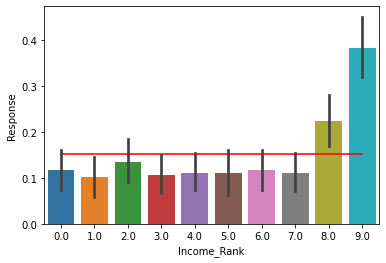

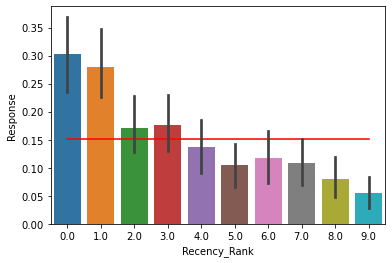

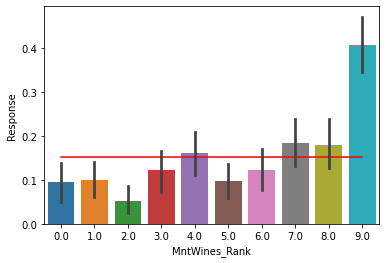

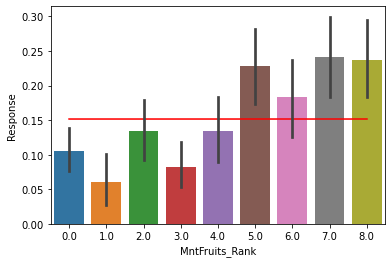

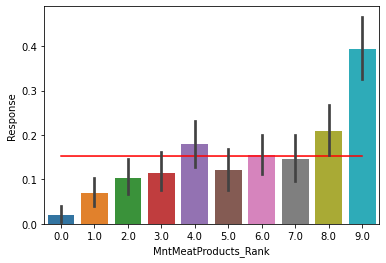

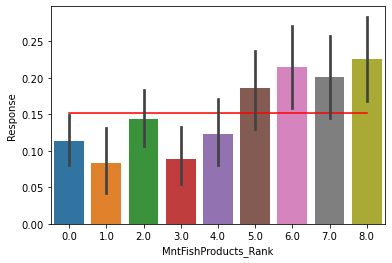

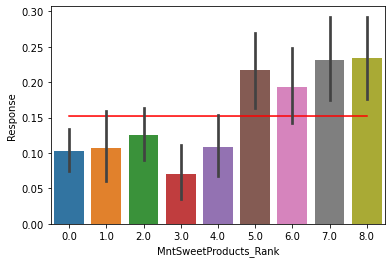

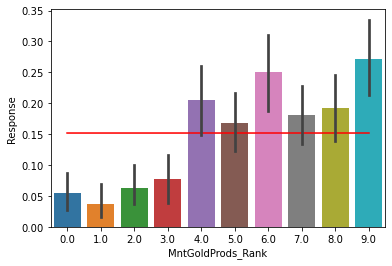

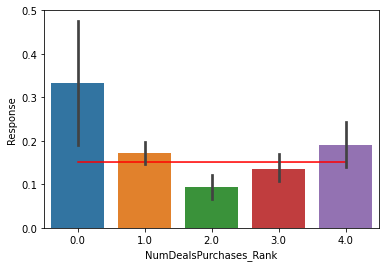

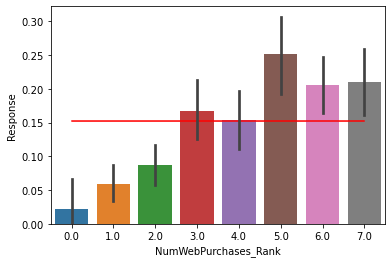

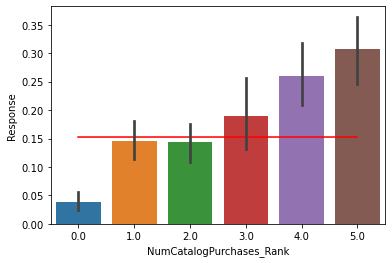

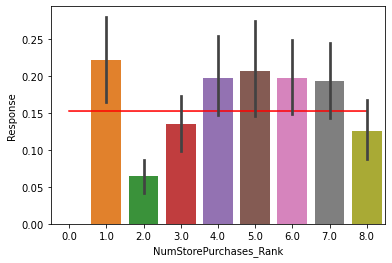

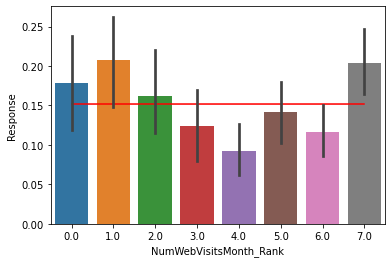

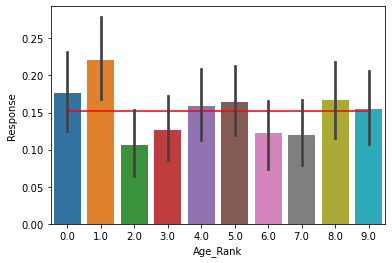

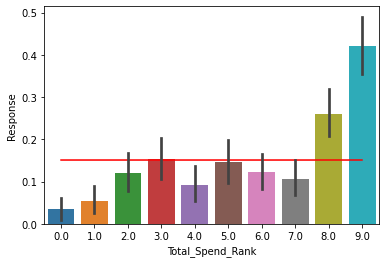

In [19]:
X_bin_combined = pd.concat([df['Response'],num_binned],axis=1,join='inner')

from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.lineplot(x=col,y=X_bin_combined['Response'].mean(),data=X_bin_combined,color='red')
    sns.barplot(x=col, y="Response",data=X_bin_combined, estimator=mean )
plt.show()

In [21]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2,k=13)
selector.fit_transform(data, df['Response'])
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)

In [22]:
select_features_df_num = data.iloc[:,cols]

In [23]:
select_features_df_num.columns

Index(['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Age',
       'Total_Spend'],
      dtype='object')

In [24]:
# Features selected by k_best
selected_num = select_features_df_num.columns

In [25]:
print("Count of Numerical Feature Selected:", len(selected_num))

Count of Numerical Feature Selected: 13


In [26]:
non_selected_num = [i for i in  data.columns if i not in selected_num]

In [27]:
non_selected_num

['NumDealsPurchases', 'NumWebVisitsMonth']

## Categorical Variable

In [28]:
categorical_features_2.remove('Response')

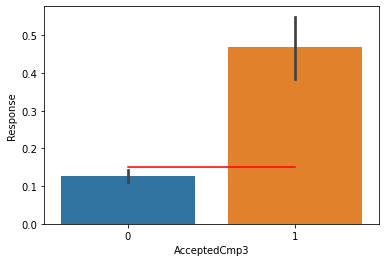

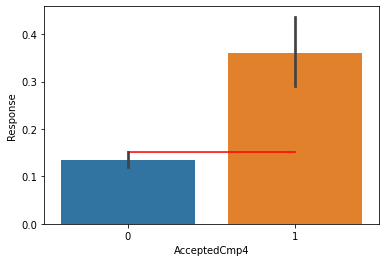

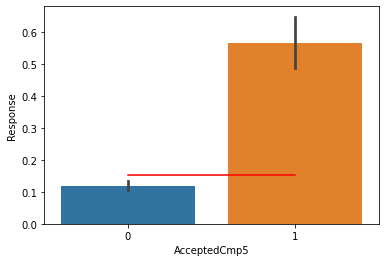

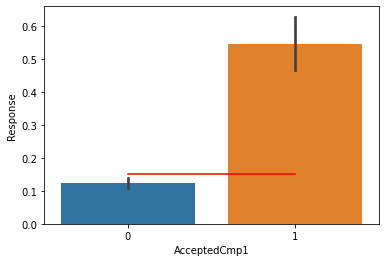

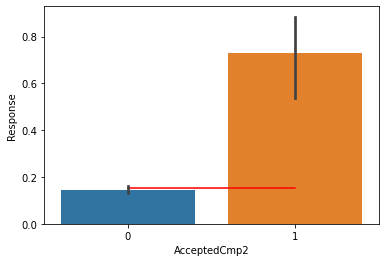

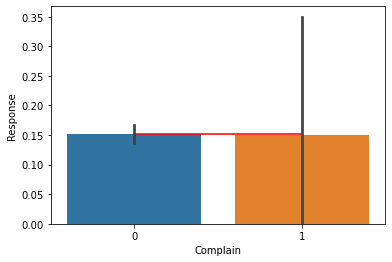

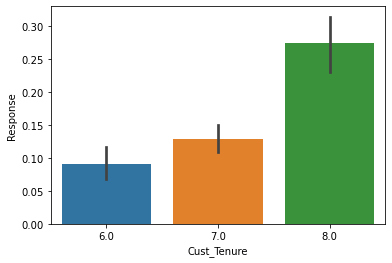

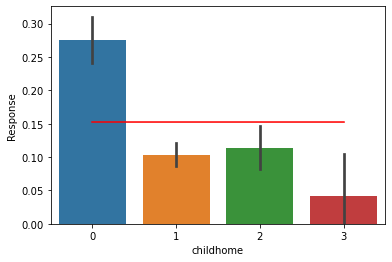

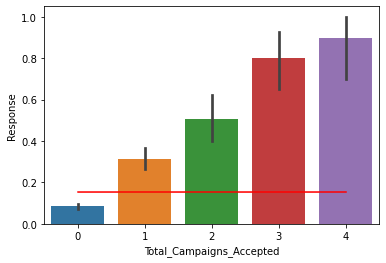

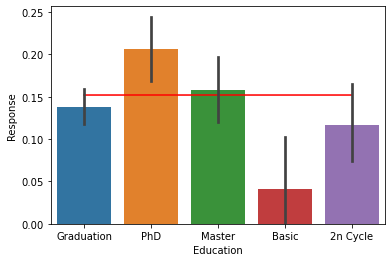

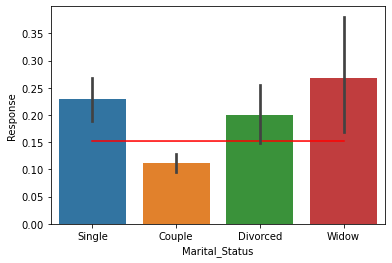

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import mean
for col in (df[categorical_features_2].columns):
    plt.figure()
    sns.lineplot(x=col,y=df['Response'].mean(),data=df[categorical_features_2],color='red')
    sns.barplot(x=col, y=df["Response"],data=df[categorical_features_2], estimator=mean )
plt.show()

In [30]:
# get dummies
df_dummies = pd.get_dummies(data=df, columns=['Marital_Status','childhome', 'Education'], drop_first=True)
                            

In [31]:
df_dummies

Income  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0     58138.0       58       635         88              546              172   
1     46344.0       38        11          1                6                2   
2     71613.0       26       426         49              127              111   
3     26646.0       26        11          4               20               10   
4     58293.0       94       173         43              118               46   
...       ...      ...       ...        ...              ...              ...   
2053  94545.1       23         9         14               18                8   
2054  61223.0       46       709         43              182               42   
2055  56981.0       91       908         48              217               32   
2056  69245.0        8       428         30              214               80   
2057  52869.0       40        84          3               61                2   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                   88            88                  3                8   
1                    1             6                  2                1   
2                   21            42                  1                8   
3                    3             5                  2                2   
4                   27            15                  5                5   
...                ...           ...                ...              ...   
2053                 1            12                  4                3   
2054               118           247                  2                9   
2055                12            24                  1                2   
2056                30            61                  2                6   
2057                 1            21                  3                3   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                      10                  4                  7             0   
1                       1                  2                  5             0   
2                       2                 10                  4             0   
3                       0                  4                  6             0   
4                       3                  6                  5             0   
...                   ...                ...                ...           ...   
2053                    1                  3                  6             0   
2054                    3                  4                  5             0   
2055                    3                 13                  6             0   
2056                    5                 10                  3             0   
2057                    1                  4                  7             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0                0             0             0             0         0   
1                0             0             0             0         0   
2                0             0             0             0         0   
3                0             0             0             0         0   
4                0             0             0             0         0   
...            ...           ...           ...           ...       ...   
2053             0             0             0             0         0   
2054             0             0             0             0         0   
2055             1             0             0             0         0   
2056             0             0             0             0         0   
2057             0             0             0             0         0   

      Response   Age  Cust_Tenure  Total_Campaigns_Accepted  Total_Spend  \
0            1  64.0          8.0                         0         1617   
1            0  67.0          6.0                         0           27   
2            0  56.0          7

In [32]:
# list of categorical features that are numerical in nature
cat =[feature for feature in df_dummies.columns if len(df_dummies[feature].unique())<=5]


### Select K Best for Categorical Features
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=18)
selector.fit_transform(df_dummies[cat], df['Response'])
### Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_categ = df_dummies[cat].iloc[:,cols]

In [33]:
print("Feature Count: {}".format(len(cat)))

Feature Count: 19


In [34]:
df_dummies.shape

(2058, 34)

In [35]:
non_selected_num

['NumDealsPurchases', 'NumWebVisitsMonth']

In [36]:
df_dummies = df_dummies.drop(['NumDealsPurchases', 'NumWebVisitsMonth','Total_Campaigns_Accepted', 'Total_Spend','Complain'], axis=1)
df_dummies.head()

Income  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  58138.0       58       635         88              546              172   
1  46344.0       38        11          1                6                2   
2  71613.0       26       426         49              127              111   
3  26646.0       26        11          4               20               10   
4  58293.0       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumWebPurchases  NumCatalogPurchases  \
0                88            88                8                   10   
1                 1             6                1                    1   
2                21            42                8                    2   
3                 3             5                2                    0   
4                27            15                5                    3   

   NumStorePurchases  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  4             0             0             0             0   
1                  2             0             0             0             0   
2                 10             0             0             0             0   
3                  4             0             0             0             0   
4                  6             0             0             0             0   

   AcceptedCmp2  Response   Age  Cust_Tenure  Marital_Status_Divorced  \
0             0         1  64.0          8.0                        0   
1             0         0  67.0          6.0                        0   
2             0         0  56.0          7.0                        0   
3             0         0  37.0          6.0                        0   
4             0         0  40.0          6.0                        0   

   Marital_Status_Single  Marital_Status_Widow  childhome_1  childhome_2  \
0                      1                     0            0            0   
1                      1                     0            0            1   
2                      0                     0            0            0   
3                      0                     0            1            0   
4                      0                     0            1            0   

   childhome_3  Education_Basic  Education_Graduation  Education_Master  \
0            0                0                     1                 0   
1            0                0                     1                 0   
2            0                0                     1                 0   
3            0                0                     1                 0   
4            0                0                     0                 0   

   Education_PhD  
0              0  
1              0  
2              0  
3              0  
4              1

In [37]:
df_dummies.shape

(2058, 29)

# Defining Target and Independent Features

In [38]:
Y=df_dummies['Response']
X=df_dummies.drop(['Response'],axis=1)

In [39]:
Y.mean()

0.152089407191448

In [40]:
X.head()

Income  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  58138.0       58       635         88              546              172   
1  46344.0       38        11          1                6                2   
2  71613.0       26       426         49              127              111   
3  26646.0       26        11          4               20               10   
4  58293.0       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumWebPurchases  NumCatalogPurchases  \
0                88            88                8                   10   
1                 1             6                1                    1   
2                21            42                8                    2   
3                 3             5                2                    0   
4                27            15                5                    3   

   NumStorePurchases  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  4             0             0             0             0   
1                  2             0             0             0             0   
2                 10             0             0             0             0   
3                  4             0             0             0             0   
4                  6             0             0             0             0   

   AcceptedCmp2   Age  Cust_Tenure  Marital_Status_Divorced  \
0             0  64.0          8.0                        0   
1             0  67.0          6.0                        0   
2             0  56.0          7.0                        0   
3             0  37.0          6.0                        0   
4             0  40.0          6.0                        0   

   Marital_Status_Single  Marital_Status_Widow  childhome_1  childhome_2  \
0                      1                     0            0            0   
1                      1                     0            0            1   
2                      0                     0            0            0   
3                      0                     0            1            0   
4                      0                     0            1            0   

   childhome_3  Education_Basic  Education_Graduation  Education_Master  \
0            0                0                     1                 0   
1            0                0                     1                 0   
2            0                0                     1                 0   
3            0                0                     1                 0   
4            0                0                     0                 0   

   Education_PhD  
0              0  
1              0  
2              0  
3              0  
4              1

In [41]:
X.shape

(2058, 28)

In [42]:
X.to_csv(r"C:\Users\priya\PycharmProjects\Response_modeling_for_supermarket\Data\Independent_features_df_1", index=False)

In [43]:
Y.to_csv(r"C:\Users\priya\PycharmProjects\Response_modeling_for_supermarket\Data\Target_feature_df_1", index=False)

                                        *************************************